In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Text(0.5, 1.0, 'galaxy distance versus red shift ')

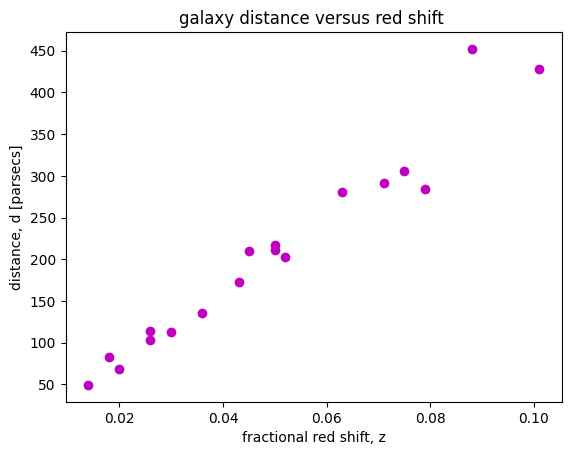

In [ ]:
hubbledata = np.loadtxt("/content/drive/MyDrive/Courses/phy508/hubble-low-z.txt")
x = hubbledata[:,0]
y = hubbledata[:,1]
N = x.size
plt.plot( x, y, 'mo')
plt.xlabel("fractional red shift, z")
plt.ylabel("distance, d [parsecs]")
plt.title('galaxy distance versus red shift ')

In [ ]:
M = np.column_stack( (x,np.ones(N)))             # define matrix M
npar = 2
#M = np.column_stack( (x**2,x,np.ones(N)))             # define matrix M
#npar = 3

# dot() returns products, transpose() returns transpose, inv() returns inverse
MTM = np.dot( M.transpose(), M)                  # 2x2 matrix
MTMINV = np.linalg.inv(MTM)                      # 2x2 matrx
MTY = np.dot(M.transpose(),y)                    # 2-element vector

In [ ]:
pars = np.dot(MTMINV,MTY)
yf =  np.dot(M,pars)
residuals = yf-y
chisq = np.sum(residuals**2)
var = chisq / (N-npar)
covs = MTMINV*var

HoINV = pars[0]*3.26e6 # conversion factor 3.26r6 c-yr / c
print("Hubble time billion years", HoINV*1e-9)
print(chisq)
print(pars)
print(var)
print(covs)

Hubble time billion years 14.503277710680772
10455.283454074983
[4448.85819346  -12.43356764]
653.4552158796864
[[58565.87125796 -2885.99598921]
 [-2885.99598921   178.51853657]]


Text(0.5, 1.0, 'galaxy distance versus red shift ')

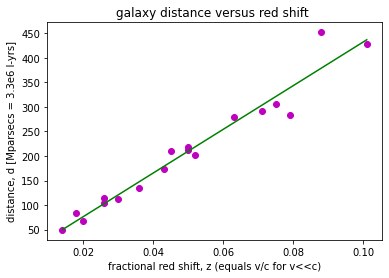

In [ ]:
plt.plot(x,y,'mo')
yf =  np.dot(M,pars)
plt.plot(x,yf,"g-")
plt.xlabel("fractional red shift, z (equals v/c for v<<c)" )
plt.ylabel("distance, d [Mparsecs = 3.3e6 l-yrs]")
plt.title('galaxy distance versus red shift ')

In [ ]:
meanx = np.sum( xi)
meany = np.sum( yi)
meanx2 = np.sum( xi**2)
meany2 = np.sum( yi**2)
meanxy = np.sum( xi*yi)
meanis2 = np.sum( 1./si**2)

In [ ]:
M = np.array([[meanx2,meanx],[meanx,meanis2]])
V = np.array([[meanxy],[meany]])
invM = np.linalg.inv(M)
pars = np.dot(invM,V)
mf = pars[0]
cf = pars[1]
dmf2 = N/(N*meanx2-meanx*meanx)
dcf2 = meanx2/(N*meanx2-meanx*meanx)
cov = -meanx/(N*meanx2-meanx*meanx)

In [ ]:
def func(x, a, b):
    return a*x+b
pars, covs = fit.curve_fit(func, xi, yi, sigma=si, absolute_sigma=True)
print(pars, covs)
print(mf,cf,dmf2,dcf2,cov)

[ 0.9622627  -4.88958576] [[ 0.01212121 -0.06666667]
 [-0.06666667  0.46666667]]
[0.9622627] [-4.88958576] 0.012121212121212121 0.4666666666666667 -0.06666666666666667


In [ ]:
plt.errorbar(xi, yi, yerr=si,fmt='mo')
plt.xlabel("x_i")
plt.ylabel("y_i")
yfi = pars[0]*xi + pars[1]
plt.plot(xi,yfi,"g-")
#yfi = mf*xi + cf
#plt.plot(xi,yfi,"r--")

In [ ]:
def chisq(p0, p1, x, y, s):
    return np.sum(( (y - p0*x - p1 ) / s )**2 )
Np = 10
chi2 = np.zeros((Np, Np))
mf = np.linspace( pars[0]-3.*np.sqrt(covs[0][0]), pars[0]+3.*np.sqrt(covs[0][0]),Np)
cf = np.linspace( pars[1]-3.*np.sqrt(covs[1][1]), pars[1]+3.*np.sqrt(covs[1][1]),Np)
print(mf,cf)
im = 0
for xm in mf:
    ic = 0
    for yc in cf:
        chi2[im][ic] = chisq(xm,yc,xi,yi,si)
        #print(xm,yc,chi2[im][ic])
        ic += 1
    im += 1
plt.contourf(mf,cf,chi2,15)